# EDA & Data Preprocessing on Google App Store Rating Dataset.

<span style="color:blue">**Domain**</span>: **Mobile device apps**

<span style="color:blue">**Context:**</span>
**The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.**

<span style="color:blue">**Objective:**</span>
**The Goal is to explore the data and pre-process it for future use in any predictive analytics study.**

<span style="color:blue">**Data set Information:**</span>
**Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.**

**1. Import required libraries and read the dataset**

In [276]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings as wr 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [127]:
wr.filterwarnings('ignore')

In [128]:
os.getcwd()

'C:\\Users\\admin'

**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [129]:
df = pd.read_csv('Apps_data+(1).csv')

In [130]:
df.head()
# first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [131]:
# last five rows
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [132]:
#selecting randomly 5 rows
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4213,My Android Device S/W & H/W,FAMILY,4.5,681,2.8M,"50,000+",Free,0,Everyone,Education,"November 20, 2015",1.1,2.3 and up
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25M,"100,000+",Paid,$24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
9390,US Army Training Courses Game,FAMILY,4.1,27130,35M,"5,000,000+",Free,0,Everyone,Simulation,"December 8, 2017",1.4,2.3 and up
8336,DF-Server Mobile,PRODUCTIVITY,4.9,17,76M,100+,Free,0,Everyone,Productivity,"June 7, 2016",1.0.0,4.4 and up
3183,Hopper - Watch & Book Flights,TRAVEL_AND_LOCAL,4.4,52028,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"June 29, 2018",Varies with device,5.0 and up


In [133]:
#shape of the data 
print('the shape of the apps dataset is: ',df.shape)
print('                                                  ')
print(df.info())

the shape of the apps dataset is:  (10841, 13)
                                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


**3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.**

In [134]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [135]:
df.describe(include='object').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<span style="color:blue">**INFERENCE:**</span>

• **Based on the summary statistics of the object data type, it appears that the 'reviews' column is numeric, but it is mistakenly labeled as an object. Similarly, the 'size,' 'installs,' and 'price' columns also seem to contain numeric data but are incorrectly assigned as objects. It is necessary to investigate these columns to identify and handle any garbage values or symbols to convert them to numeric.**

• **Additionally, the categorical variables, namely 'Category,' 'Type,' 'Content Rating,' and 'Rating_category,' need to be encoded. A new column can be created based on the 'Rating' column, where if the rating is greater than 3.5, it is categorized as 'high'; otherwise, it is labeled as 'low,' and this new column can be named 'Rating_category.'**

• **Furthermore, columns such as 'Rating,' 'App,' 'Genres,' 'Last Updated,' 'Current Ver,' and 'Android Ver' contain redundant data due to a large number of unique values. It is advisable to remove these columns.**

**4. Check if there are any duplicate records in the dataset? if any drop them.**

In [136]:
print('Total number of duplicates : ',df.duplicated().sum())

Total number of duplicates :  483


In [137]:
df.drop_duplicates(inplace=True)

In [138]:
print('After droping duplicates : ',df.duplicated().sum())

After droping duplicates :  0


In [139]:
df.shape

(10358, 13)

**5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [140]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [141]:
# by seeing the unique values we can see that 1.9 is a ivalidid category so i dropped it by using this method

df =df[df['Category']!='1.9'].reset_index(drop=True)

In [142]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [143]:
df.shape

(10357, 13)

**6. Check if there are missing values present in the column Rating, If any? drop them and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [144]:
df['Rating'].isnull().sum()
# yes there is presence of null values in column rating it contains 1465 null values

1465

In [145]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [146]:
df.dropna(inplace=True)

In [147]:
print("The presence of null value after diopping na: ",df.isna().sum().sum())
print("                                                             ")
print('the shape of df after dropping na: ',df.shape)

The presence of null value after diopping na:  0
                                                             
the shape of df after dropping na:  (8886, 13)


In [148]:
df['Rating_category'] = np.where(df['Rating']>3.5,'High','low')

In [149]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [150]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   object 
 4   Size             8886 non-null   object 
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


**7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

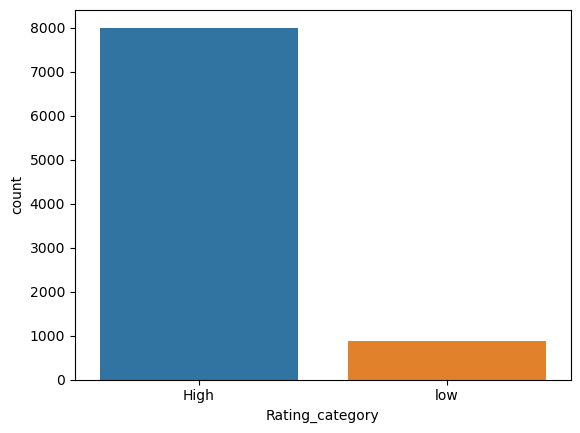

                                     
Rating_category
High    0.90108
low     0.09892
Name: proportion, dtype: float64


In [151]:
sns.countplot(data=df, x='Rating_category')
plt.show()
print('                                     ')
print(df['Rating_category'].value_counts(normalize=True))

<span style="color:blue">**INFERENCE:**</span>

• **From this, we can conclude that almost 90% of the apps are rated high, while only 10% of apps receive low ratings. According to the data, if a new app is released, there is a 90% chance that it will receive a rating higher than 3.5.**

**• This is because the data in not balanced properly so we are getting this kind of result.Hence The distribution is imbalanced we have to balance the data.**

**8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)**


In [152]:
df['Reviews']=df['Reviews'].astype(int)

In [153]:
df['Reviews'].dtype

dtype('int32')

In [154]:
df['Reviews'].skew()
# the skewness is very high that means data consist of very large outliers we can remove outliers 
# or we can also transform outliers

16.202305142596288

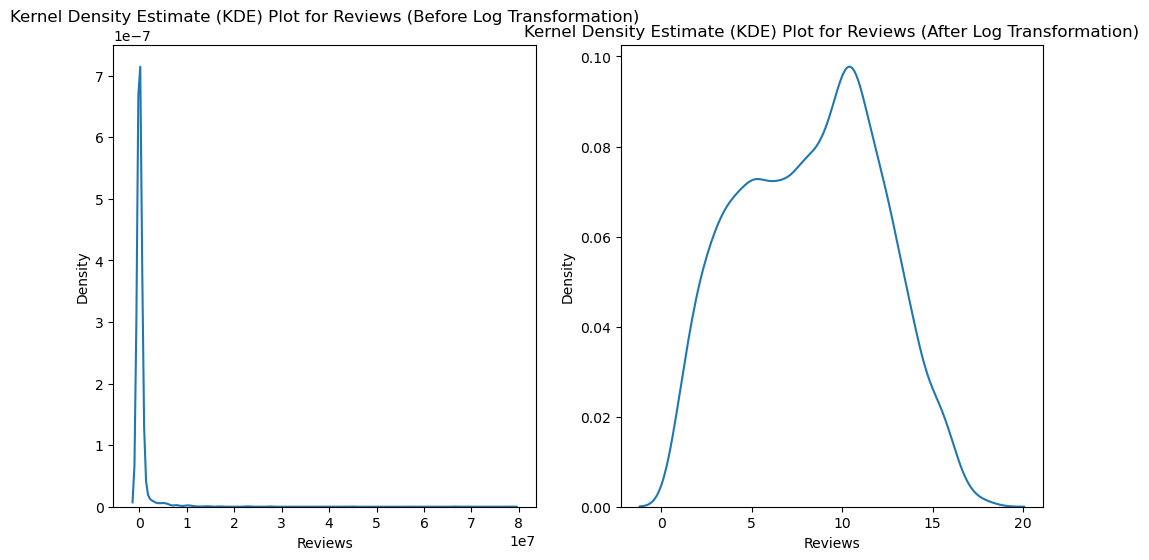

In [155]:
plt.figure(figsize=(12, 6))

# Before Log Transformation
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Reviews')
plt.title('Kernel Density Estimate (KDE) Plot for Reviews (Before Log Transformation)')

# After Log Transformation
plt.subplot(1, 2, 2)
sns.kdeplot(np.log1p(df['Reviews'])) 
plt.title('Kernel Density Estimate (KDE) Plot for Reviews (After Log Transformation)')

plt.show()

In [156]:
df['Reviews']=np.log1p(df['Reviews'])

In [157]:
np.log1p(df['Reviews']).skew()

-0.8932238764607986

**9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')**


In [158]:
# replacing m with millon by removing m and multiplied by 1000000 
#similary for k with 1000 and varies with device is replace by nan for that i created a funtion

def convert_size(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3
    else:
        return pd.NA

In [159]:
df['Size'] = df['Size'].apply(convert_size) # applying this funtion to column Size.

In [167]:
df.isnull().sum() # now varies with devices become →nan 

App                   0
Category              0
Rating                0
Reviews               0
Size               1468
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Rating_category       0
dtype: int64

In [173]:
df.dropna(inplace=True) # Dropping 'varies with device' which is replaced by NA and reset the index
df.reset_index(drop=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [174]:
df.shape

(7418, 14)

In [178]:
df['Size']=df['Size'].astype(float)

In [188]:
print('The datatype of column "size" is:',df['Size'].dtype)

The datatype of column "size" is: float64


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7418 non-null   object 
 1   Category         7418 non-null   object 
 2   Rating           7418 non-null   float64
 3   Reviews          7418 non-null   float64
 4   Size             7418 non-null   float64
 5   Installs         7418 non-null   object 
 6   Type             7418 non-null   object 
 7   Price            7418 non-null   object 
 8   Content Rating   7418 non-null   object 
 9   Genres           7418 non-null   object 
 10  Last Updated     7418 non-null   object 
 11  Current Ver      7418 non-null   object 
 12  Android Ver      7418 non-null   object 
 13  Rating_category  7418 non-null   object 
dtypes: float64(3), object(11)
memory usage: 869.3+ KB


**10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type**

In [196]:
df['Installs'].head() # the unwanted characters need to be treated is '+',","

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [206]:
df['Installs']=df['Installs'].replace({'[,+]': ''}, regex=True)

In [209]:
df['Installs']=df['Installs'].astype(int)

In [213]:
print('The datatype of column "Installs" is: ',df['Installs'].dtype)

The datatype of column "Installs" is:  int32


**11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [216]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [218]:
df['Price']=df['Price'].str.replace('$',"").astype(float)

In [219]:
df['Price'].dtype

dtype('float64')

**12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [223]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')


In [225]:
#dropping column rating
df.drop(columns=['Rating','App','Genres','Last Updated', 'Current Ver','Android Ver' ],axis=1,inplace=True)

In [226]:
# shape of data after dropping redundant columns 
df.shape

(7418, 8)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 0 to 10356
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7418 non-null   object 
 1   Reviews          7418 non-null   float64
 2   Size             7418 non-null   float64
 3   Installs         7418 non-null   int32  
 4   Type             7418 non-null   object 
 5   Price            7418 non-null   float64
 6   Content Rating   7418 non-null   object 
 7   Rating_category  7418 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 492.6+ KB


**13. Encode the categorical columns.**

In [229]:
for i in df.select_dtypes(include='object').columns:
    print(f'{i}: ',df[i].nunique())

Category:  33
Type:  2
Content Rating:  6
Rating_category:  2


In [232]:
df1=pd.get_dummies(data=df,columns=['Category','Type','Content Rating','Rating_category'],drop_first=True)

In [233]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 0 to 10356
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Reviews                       7418 non-null   float64
 1   Size                          7418 non-null   float64
 2   Installs                      7418 non-null   int32  
 3   Price                         7418 non-null   float64
 4   Category_AUTO_AND_VEHICLES    7418 non-null   bool   
 5   Category_BEAUTY               7418 non-null   bool   
 6   Category_BOOKS_AND_REFERENCE  7418 non-null   bool   
 7   Category_BUSINESS             7418 non-null   bool   
 8   Category_COMICS               7418 non-null   bool   
 9   Category_COMMUNICATION        7418 non-null   bool   
 10  Category_DATING               7418 non-null   bool   
 11  Category_EDUCATION            7418 non-null   bool   
 12  Category_ENTERTAINMENT        7418 non-null   bool   
 13  Categor

**14. Segregate the target and independent features (Hint: Use Rating_category as the target**

In [242]:
x=df1.drop(['Rating_category_low'],axis=1)
y=df1['Rating_category_low']

In [243]:
x.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000000.0,10000,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6.875232,14000000.0,500000,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,11.379520,8700000.0,5000000,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,12.281389,25000000.0,50000000,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6.875232,2800000.0,100000,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [244]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Rating_category_low, dtype: bool

**15. Split the dataset into train and test.**

In [247]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [250]:
x_train.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1846,5.081404,67000000.0,50000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
32,8.524367,11000000.0,100000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9554,9.179881,23000000.0,100000,0.99,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4662,4.174387,15000000.0,10000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7284,2.890372,1500000.0,50,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [251]:
x_test.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5441,4.700480,30000000.0,10000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9560,5.129899,170000.0,5000,4.99,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
9824,2.772589,26000000.0,1000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3984,9.604610,8600000.0,1000000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1453,16.956793,97000000.0,100000000,0.00,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [252]:
y_train.head()

1846    False
32      False
9554    False
4662    False
7284    False
Name: Rating_category_low, dtype: bool

In [253]:
y_test.head()

5441    False
9560     True
9824    False
3984    False
1453    False
Name: Rating_category_low, dtype: bool

In [255]:
print('The shape of x_train:',x_train.shape)
print('The shape of x_test:',x_test.shape)
print('The shape of y_train:',y_train.shape)
print('The shape of y_test:',y_test.shape)

The shape of x_train: (5192, 42)
The shape of x_test: (2226, 42)
The shape of y_train: (5192,)
The shape of y_test: (2226,)


**16. Standardize the data, so that the values are within a particular range.**

In [260]:
scaler = StandardScaler()
for i in x_train.select_dtypes(exclude='bool').columns:
    x_train[i]=scaler.fit_transform(x_train[[i]])
    

In [265]:

for i in x_test.select_dtypes(exclude='bool').columns:
    x_test[i] = scaler.fit_transform(x_test[[i]])

In [266]:
x_train.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1846,-0.682813,1.867656,-0.165160,-0.064906,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
32,0.247690,-0.501998,-0.164111,-0.064906,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9554,0.424851,0.005785,-0.164111,-0.009943,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4662,-0.927946,-0.332737,-0.166000,-0.064906,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7284,-1.274967,-0.903992,-0.166209,-0.064906,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [267]:
x_test.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
5441,-0.820394,0.325479,-0.176755,-0.058592,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9560,-0.703216,-0.972846,-0.176871,0.234946,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
9824,-1.346466,0.151382,-0.176964,-0.058592,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3984,0.517818,-0.605937,-0.153767,-0.058592,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1453,2.524042,3.241595,2.145077,-0.058592,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [279]:
y.value_counts(normalize=True)
#we can clearly say that the data is imbalanced so we have to make it balance.

Rating_category_low
False    0.888919
True     0.111081
Name: proportion, dtype: float64

In [280]:
logit=LogisticRegression()
logit = LogisticRegression(solver='newton-cg', n_jobs=-1,class_weight={0:0.111,1:0.889})
model=logit.fit(x_train, y_train)# For balancing we have to add extra tuning paramaeter 'class_weight'

In [281]:
pred_train = logit.predict(x_train)
pred_test = logit.predict(x_test)

In [282]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

       False       0.95      0.65      0.78      4615
        True       0.21      0.74      0.33       577

    accuracy                           0.66      5192
   macro avg       0.58      0.70      0.55      5192
weighted avg       0.87      0.66      0.73      5192



In [283]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       False       0.95      0.65      0.77      1979
        True       0.20      0.72      0.32       247

    accuracy                           0.66      2226
   macro avg       0.58      0.68      0.54      2226
weighted avg       0.87      0.66      0.72      2226

